In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline
from glob import glob

In [54]:
data = np.load('./data/data_clean_all_14400_norm.npz')

In [74]:
X = data['arr_0']
print(X)
y = data['arr_1']
print(y)

[[0.58431373 0.58823529 0.58431373 ... 0.50196078 0.49411765 0.58039216]
 [0.58823529 0.59215686 0.58039216 ... 0.58039216 0.60784314 0.60784314]
 [0.59215686 0.58823529 0.59215686 ... 0.34901961 0.36470588 0.47058824]
 ...
 [0.58823529 0.58823529 0.58823529 ... 0.5372549  0.54117647 0.59215686]
 [0.58431373 0.59607843 0.58039216 ... 0.54117647 0.50980392 0.58431373]
 [0.58431373 0.59607843 0.6        ... 0.30980392 0.39215686 0.23529412]]
[3 3 3 ... 5 5 5]


In [56]:
X1 = X - X.mean(axis=0)

In [57]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA(n_components = None, whiten=True,svd_solver='auto')

In [59]:
x_pca = pca.fit_transform(X1)

In [60]:
x_pca.shape

(2586, 2586)

In [61]:
eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

Text(0, 0.5, 'Explained Variance')

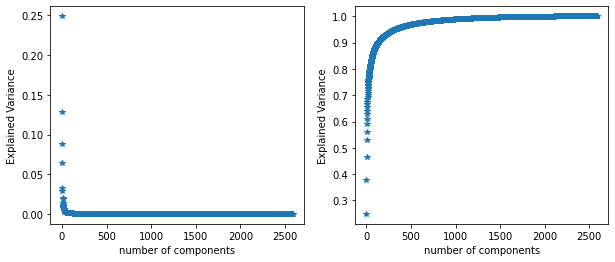

In [62]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio,'*')
plt.xlabel('number of components')
plt.ylabel('Explained Variance')
plt.subplot(1,2,2)
plt.plot(eigen_ratio_cum,'*')
plt.xlabel('number of components')
plt.ylabel('Explained Variance')

Weźmiemy pod uwagę 250 komponentów, które tłumaczą około 95% wariancji.

In [63]:
pca_250 = PCA(n_components = 250, whiten=True,svd_solver='auto')

In [76]:
x_pca_250 = pca_250.fit_transform(X1)

In [66]:
x_pca_250.shape

(2586, 250)

In [67]:
import pickle
pickle.dump(pca_250, open('./model/pca_250.pickle','wb'))

In [68]:
x_pca_inv = pca_250.inverse_transform(x_pca_250)

In [69]:
x_pca_inv.shape

(2586, 14400)

In [70]:
eig_img = x_pca_inv[0,:]
eig_img = eig_img.reshape((120,120))
eig_img.shape

(120, 120)

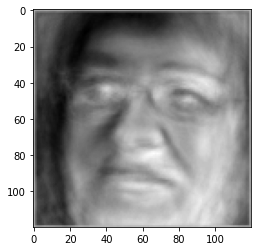

In [71]:
plt.imshow(eig_img, cmap='gray')

In [75]:
np.savez('./data/data_pca_250_y_mean.pickle',x_pca_250,y,X.mean(axis=0))